# Machine Learning

NAME:- Raushan Kr. Jha,
SID:- 102488

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv(r"C:\Users\farid\Downloads\Ice_cream selling data.csv")

In [4]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [5]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


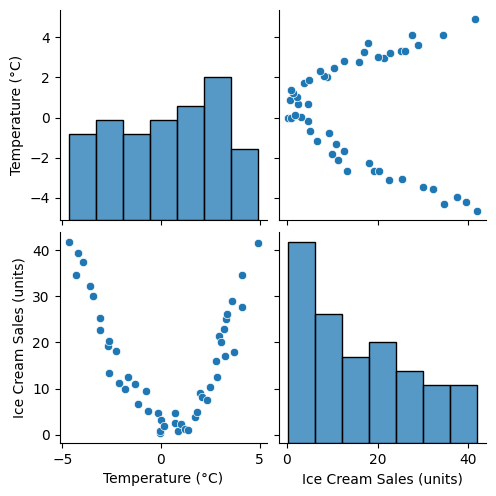

In [7]:
sns.pairplot(df)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [21]:
X = df.drop(columns=["Ice Cream Sales (units)"]) 
y = df["Ice Cream Sales (units)"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
linear_model = LinearRegression()

In [25]:
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
y_pred = linear_model.predict(X_test_scaled)

In [18]:
y_pred

array([[19.2247831 ],
       [12.89218952],
       [12.39975758],
       [12.99914196],
       [18.0259032 ],
       [15.96490086],
       [16.13605851],
       [16.34394177],
       [15.0173946 ],
       [17.3107825 ]])

In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
r2 = r2_score(y_test, y_pred)

In [28]:
print("Linear Regression Model")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Linear Regression Model
Mean Squared Error (MSE): 149.32629119325185
R-squared (R²): -0.5751270190188227


In [30]:
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)

Coefficients: [-3.17710024]
Intercept: 17.13432359205404


# Using Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [34]:
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [35]:
poly_model = LinearRegression()

In [36]:
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [37]:
y_poly_pred = poly_model.predict(X_test_poly)

In [38]:
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

In [39]:
print("Polynomial Regression (Degree 2)")
print("Mean Squared Error:", mse_poly)
print("R^2 Score:", r2_poly)

Polynomial Regression (Degree 2)
Mean Squared Error: 14.878796440981484
R^2 Score: 0.843055137193884


In [42]:
print(X_test.shape)  # Outputs (number of rows, number of columns)

(10, 1)


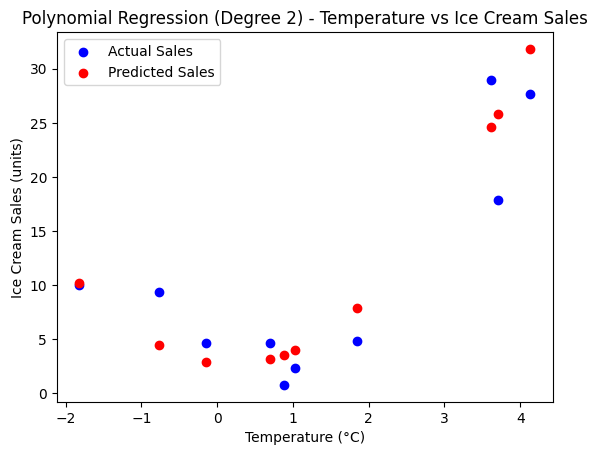

In [44]:
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')  # Original points
plt.scatter(X_test, y_poly_pred, color='red', label='Predicted Sales')  # Predicted points
plt.title('Polynomial Regression (Degree 2) - Temperature vs Ice Cream Sales')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.show()